#### EXERCÍCIO AVALIATIVO 02: Ising

In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

In [2]:
def initialize_lattice(size, initial_state):
    if initial_state == 'random':
        return 2 * np.random.randint(2, size=(size, size)) - 1
    elif initial_state == 'aligned':
        return np.ones((size, size), dtype=int)
    else:
        raise ValueError("Invalid value for beta. Use 0 or np.inf.")

In [3]:
def calculate_energy(lattice, i, j):
    size = lattice.shape[0]
    spin = lattice[i, j]
    neighbors_sum = lattice[(i + 1) % size, j] + lattice[i, (j + 1) % size] + \
                    lattice[(i - 1) % size, j] + lattice[i, (j - 1) % size]
    return -spin * neighbors_sum

In [4]:
def calculate_magnetization(lattice):
    return np.sum(lattice)

In [5]:
def metropolis(lattice, temperature):
    size = lattice.shape[0]
    i, j = np.random.randint(0, size, size=2)
    current_energy = calculate_energy(lattice, i, j)
    flip_spin = -lattice[i, j]
    new_energy = calculate_energy(lattice, i, j)

    if new_energy < current_energy or np.random.rand() < np.exp((current_energy - new_energy) / temperature):
        lattice[i, j] = flip_spin

In [6]:
def find_thermalization_steps(lattice, temperature, threshold=0.01, max_steps=5000):
    prev_energy = 0.5 * np.sum(-lattice * (np.roll(lattice, 1, axis=0) + np.roll(lattice, 1, axis=1)))

    for step in range(max_steps):
        metropolis(lattice, temperature)
        energy = 0.5 * np.sum(-lattice * (np.roll(lattice, 1, axis=0) + np.roll(lattice, 1, axis=1)))

        if np.abs(energy - prev_energy) < threshold:
            return step

        prev_energy = energy

    return max_steps

In [7]:
def ising_model_simulation(size, temperature, num_steps, initial_state):
    lattice = initialize_lattice(size, initial_state)
    energies = np.zeros(num_steps)
    magnetizations = np.zeros(num_steps)

    thermalization_steps = find_thermalization_steps(lattice, temperature)
    #print(f'Thermalization steps for initial_state = {initial_state}: {thermalization_steps}')

    for step in range(num_steps):
        metropolis(lattice, temperature)
        energy = 0.5 * np.sum(-lattice * (np.roll(lattice, 1, axis=0) + np.roll(lattice, 1, axis=1)))
        magnetization = calculate_magnetization(lattice)

        energies[step] = energy
        magnetizations[step] = magnetization

    return lattice, energies, magnetizations

##### Processo de termalização

Exemplo para tamanho e temperatura fixos:

In [8]:
size = 32
temperature = 1.5
num_steps = 1000

In [9]:
# Simulation for equally distributed spins initial state
lattice_random, energies_random, magnetizations_random = ising_model_simulation(
    size, temperature, num_steps, initial_state='random')

In [10]:
# Simulation for aligned spins initial state
lattice_aligned, energies_aligned, magnetizations_aligned = ising_model_simulation(
    size, temperature, num_steps, initial_state='aligned')

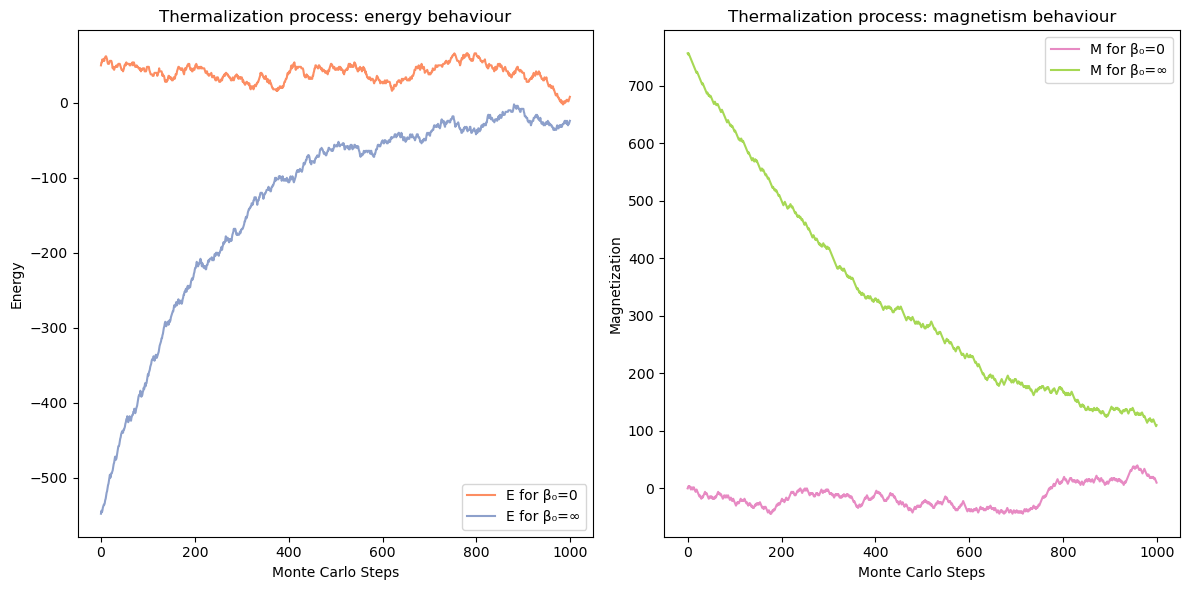

In [11]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cm = plt.get_cmap('Set2')

# Plot for Energy
ax1.plot(energies_random, color=cm(1), label='E for β₀=0')
ax1.plot(energies_aligned, color=cm(2), label='E for β₀=∞')
ax1.set_xlabel('Monte Carlo Steps')
ax1.set_ylabel('Energy')
ax1.set_title('Thermalization process: energy behaviour')
ax1.legend()

# Plot for Magnetization
ax2.plot(magnetizations_random, color=cm(3), label='M for β₀=0')
ax2.plot(magnetizations_aligned, color=cm(4), label='M for β₀=∞')
ax2.set_xlabel('Monte Carlo Steps')
ax2.set_ylabel('Magnetization')
ax2.set_title('Thermalization process: magnetism behaviour')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Exemplo para tamanho fixo e temperatura variável**

In [12]:
T = [0.1, 10.1, 20.1, 30.1, 40.1, 50.1, 60.1, 70.1, 80.1, 90.1, 100.1]

In [13]:
plt.figure(1)
plt.figure(2);

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

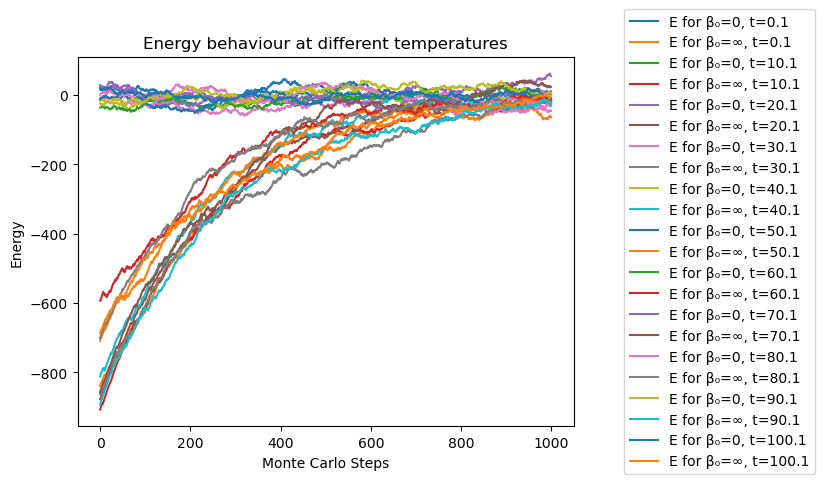

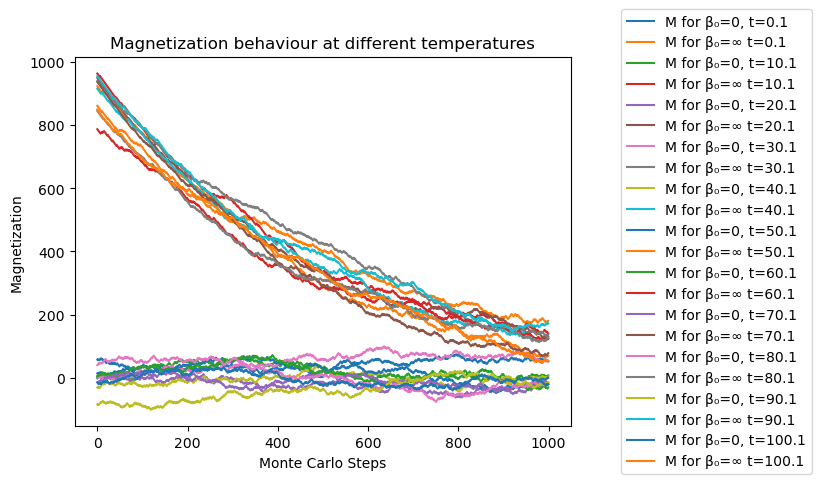

In [22]:
for i, t in enumerate(T):
    # Simulation for equally distributed spins initial state
    lattice_random, energies_random, magnetizations_random = ising_model_simulation(
        size, t, num_steps, initial_state='random')
    # Simulation for aligned spins initial state
    lattice_aligned, energies_aligned, magnetizations_aligned = ising_model_simulation(
        size, t, num_steps, initial_state='aligned')
    
    # Plot energy for current temperature
    plt.figure(1)
    plt.plot(energies_random, label=f'E for β₀=0, t={t}')
    plt.plot(energies_aligned, label=f'E for β₀=∞, t={t}')

    # Plot magnetization current temperature
    plt.figure(2)
    plt.plot(magnetizations_random, label=f'M for β₀=0, t={t}') 
    plt.plot(magnetizations_aligned, label=f'M for β₀=∞ t={t}') 

# Set plot labels and title
plt.figure(1)
plt.title(f'Energy behaviour at different temperatures')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Energy')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.figure(2)
plt.title(f'Magnetization behaviour at different temperatures')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Magnetization')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.show()

**Exemplo para tamanho variável e temperatura fixa**

In [15]:
L = [1, 21, 31, 41, 51, 61, 71, 81, 91, 101]

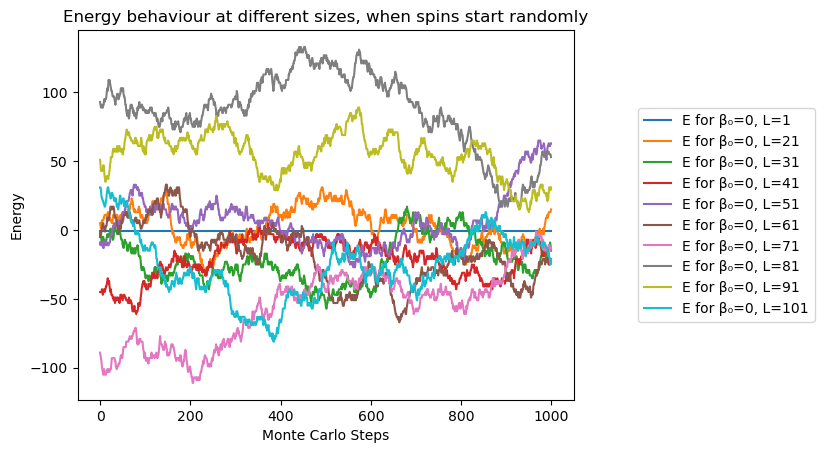

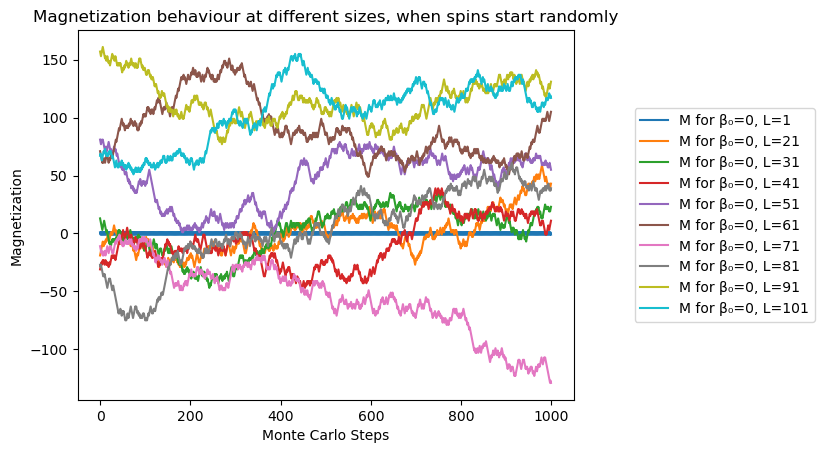

In [16]:
for l in L:
    # Simulation for equally distributed spins initial state
    lattice_random, energies_random, magnetizations_random = ising_model_simulation(
        l, temperature, num_steps, initial_state='random')

    # Plot energy for current temperature
    plt.figure(1)
    plt.plot(energies_random, label=f'E for β₀=0, L={l}')

    # Plot magnetization current temperature
    plt.figure(2)
    plt.plot(magnetizations_random, label=f'M for β₀=0, L={l}') 

# Set plot labels and title
plt.figure(1)
plt.title(f'Energy behaviour at different sizes, when spins start randomly')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Energy')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.figure(2)
plt.title(f'Magnetization behaviour at different sizes, when spins start randomly')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Magnetization')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.show()

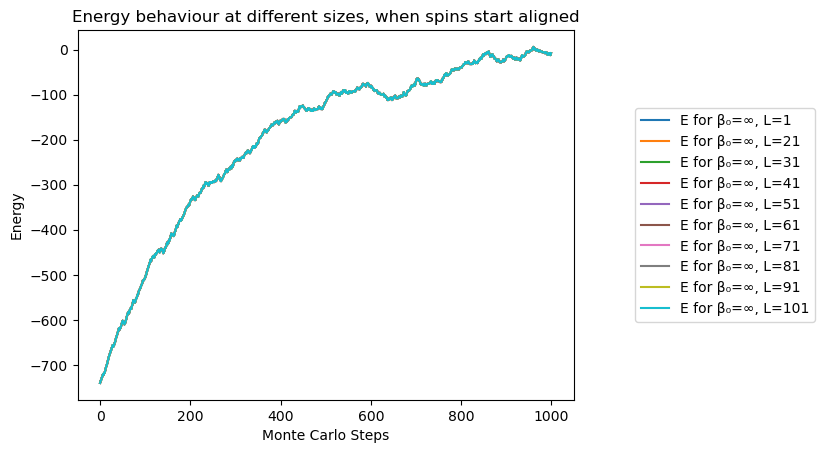

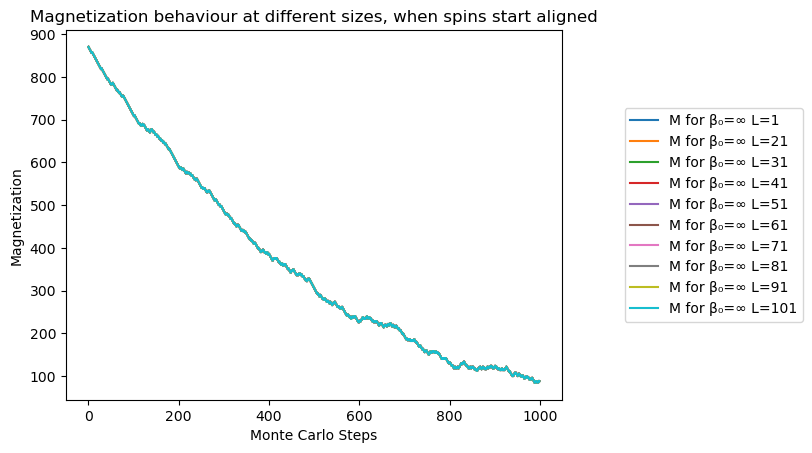

In [17]:
for l in L:
    # Simulation for equally distributed spins initial state
    lattice_random, energies_random, magnetizations_random = ising_model_simulation(
        l, temperature, num_steps, initial_state='aligned')
    
    # Plot energy for current temperature
    plt.figure(1)
    plt.plot(energies_aligned, label=f'E for β₀=∞, L={l}')

    # Plot magnetization current temperature
    plt.figure(2)
    plt.plot(magnetizations_aligned, label=f'M for β₀=∞ L={l}') 

# Set plot labels and title
plt.figure(1)
plt.title(f'Energy behaviour at different sizes, when spins start aligned')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Energy')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.figure(2)
plt.title(f'Magnetization behaviour at different sizes, when spins start aligned')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Magnetization')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.show()

**Conclusão**

Variação na temperatura

Variação no espaço